# Correlation Analysis: Two Variables

**Introduction**

Correlation analysis can help us understand whether, and how strongly, a pair of variables are related.

In data science and machine learning, this can help us understand relationships between features/predictor variables and outcomes. It can also help us understand dependencies between different feature variables.

**Correlation coefficient**

In correlation analysis, we also estimate a sample correlation coefficient between a pair of variables. Correlation coefficient of a pair of variables helps us understand how strongly one variable changes with respect to another.

Correlation coefficient ranges between a value of -1 to 1.

The graphs below show different pairs of variables with different correlation coefficient 
ρ
:


Graphs of different variables with different Correlation Coefficients. [Source: Wikipedia]
The magnitude signifies the strength of relationship between the variables.

So, a value of of -1 or +1 indicates that the two variables are perfectly related.
A value of 0 indicates that the variables have no relation.
The sign (positive / negative) signifies the direction of relationship:

A positive value indicates that higher values of one variable are accompanied with higher values of the other variable
A negative value indicates that higher values of one variable are accompanied with lower values of the other variable

**Importing**

We will be using the standard data science libraries — NumPy, Pandas, Matplotlib and Seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# change pandas display options
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 20)

In [8]:
wine_data = pd.read_csv('wine.txt')

In [9]:
tips_data = pd.read_csv('tips.csv')

In [7]:
wine_data.head()

,Wine,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Correlation analysis between a pair of Numerical variables**

To explore correlation between two numerical variables, we will use two different kinds of plots: **Scatter plots** and **Hexbin plots.**

**Scatter Plots**


We'll start by plotting the *tips* variable against the *total_bill* variable.

To do so, we will use the jointplot() function from the seaborn library.

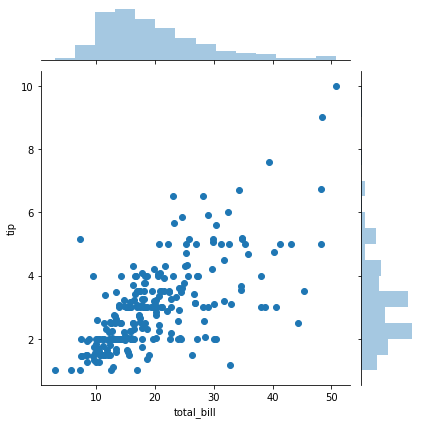

In [12]:
sns.jointplot(tips_data["total_bill"], tips_data["tip"])
plt.show()

As you can see, apart from plotting a scatter plot, the jointplot() function also plots the univariate distribution of x and y on the x and y axis.

**Analysis:**

We can infer from this graph that there is indeed a positive correlation between tip and total_bill. However, it looks like the correlation is stronger for lower values of total_bill than the higher values.

For lower values (between about 0 to 20), the values of tip rises steadily with an increase in value of total_bill.

But as the value of total_bill increases (between 30 to 50), we see the variance in tip increasing. Some values of tip are high for high total_bill while some values of tip are very low. So the correlation at this stage is not very strong.

We can also see that total_bill is more skewed than tip, which is relatively more symmetric, centered roughly around 3 dollars.

These insights would have been hard to extract without visualisation.

**Hexbin plots**

As we saw in the graph above, the data-points in a scatter plot may overlap each other. This makes it harder to gauge the density of points in certain regions of the plot.

The **hexbin plot** helps overcome this problem.

Let us use the same variables to plot a hexbin plot. We will use the same jointplot() function, but this time we will pass the kind parameter the value **"hex".**

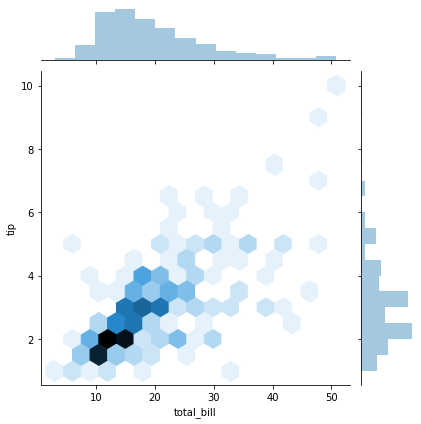

In [13]:
sns.jointplot(tips_data["total_bill"], tips_data["tip"], kind="hex")
plt.show()

Hexbin plots are equivalent of bar graphs, but for a pair of variables. It creates hexagonal bins, dividing the data in both x and y axis into intervals. The darker the colour of the hexagon, the higher is the frequency in that interval.

**Analysis**

As we can again see, there is a strong cluster of points at the lower values of tips and total_bill, while the data is much more spread out at the higher values.

This means that the tip is very likely to be USD 2-USD 4 if the total_bill is between USD 10 and USD 20. But if the total_bill is between USD 40 and USD 50, the tip could range anywhere between USD 3 and USD 10, all values being more or less equally likely.

### Correlation analysis between a Numerical and a Categorical variable

To explore correlation between a categorical and a numerical variable, we will use **Strip plots**, **Swarm plots**, **Boxplots** and **Violin Plots**. All the these plots will be drawn using functions from the seaborn library.

**Strip Plots**

Strip plots are similar to scatter plots, but for the situation when one of the variables is categorical.

We will be using the stripplot() function. 

Let us plot the output variable tip against the input variable time from tips_data.

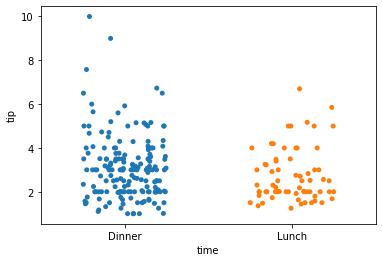

In [15]:
sns.stripplot(x="time", y="tip", data=tips_data, jitter=0.25)
plt.show()

**Analysis**

Although the difference isn't drastic, it looks like dinner tips on average are higher than lunch tips.

We can also see that the number of data points is more for dinner.

**Strip Plot for wine dataset**

Let us now plot the output variable Wine against the input variable Alcohol from wine_data

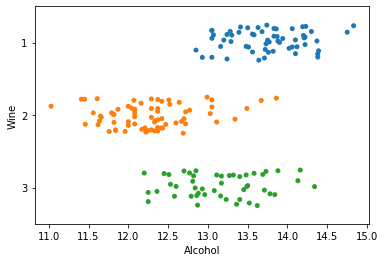

In [16]:
sns.stripplot(x="Alcohol", y="Wine", data=wine_data, orient="h", jitter=0.25)
plt.show()

**Analysis:**

We can very clearly see that there is a relationship between Alcohol levels and category of Wine.

Wines of category 2 have much lower Alcohol levels (average around 12%).

Wines of category 1 have the highest Alcohol levels (average around 13.5% - 14%).

And wines of category 3 are somewhere in the middle. (average Alcohol level around 13% - 13.5%).

**Swarm plots**

One of the major problems with strip plots was the overlap of data points, which made it difficult to understand the density of points in some places.

Swarm plots are similar to strip plots, but the points are adjusted so that they don't overlap.

We will be using the swarmplot() function.

Let us plot the variables tip against day from tips_data:

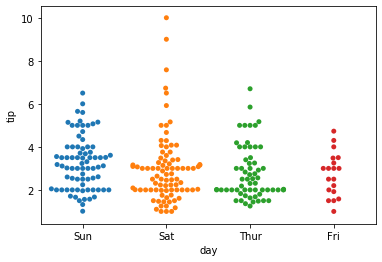

In [17]:
sns.swarmplot(x="day", y="tip", data=tips_data)
plt.show()

We can see, the plots are much cleaner than the strip plots. The breadth of the plots gives us a good sense of where most of the data points lie.

**Analysis**

We can draw the following inferences:

Majority of the data seems to be from the weekend.

On average, tips on weekends seem to be higher than tips on weekdays.

We can see a lot of points on the same horizontal line. That's probably because people like paying tips in round values such as USD 2, USD 3 , USD 4 or USD 2.50, USD 3.50 and so forth.

**Boxplots**

The orient parameter is used exactly for the same reason as we saw in the Swarm plot section — that is, to explicitly provide information about which variable is categorical.

Let us plot a graph between Proline and Wine from wine_data:

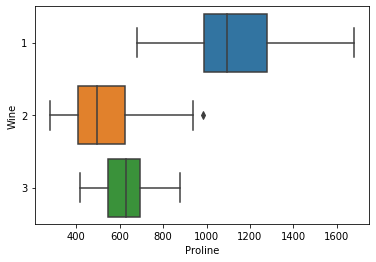

In [18]:
sns.boxplot(x="Proline", y="Wine", data=wine_data, orient="h")
plt.show()

**Analysis:**

As we can see, the plot gives us a good view of the relation between proline and wine category, without actually plotting the individual data points.

For category 1 Wine, the median Proline level is higher than any value of Proline from category 2 and 3 Wine. Thus high values of Proline directly imply that the wine is from category 1.

For low levels of Proline means, the overlap between category 2 and 3 is quite high, so we can't say much conclusively about them from this plot.

**Violinplots**

Violinplots are similar to boxplots, but they have the added advantage that it also shows the actual underlying distribution of the data.

Here's what a sample violin plot looks like:

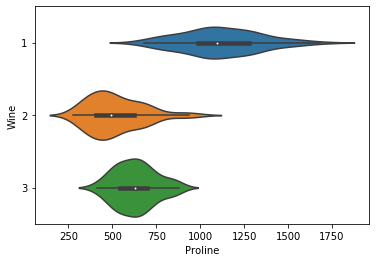

In [19]:
sns.violinplot(x="Proline", y="Wine", data=wine_data, orient="h")
plt.show()

**Analysis**

From this plot, we could make all the conclusions we made earlier from the boxplot.

In addition, we can see the Proline levels for category 2 vs category 3 Wines much more clearly, and although there is an overlap, the modes are slightly separated.